In [4]:
import pandas as pd

file_path = 'SC_DATA.csv'
sc_data = pd.read_csv(file_path)

# Display basic information and the first few rows of the dataset
sc_data_info = sc_data.info()
sc_data_head = sc_data.head()

sc_data_info, sc_data_head

<class 'pandas.core.frame.DataFrame'>
RangeIndex: 24203 entries, 0 to 24202
Data columns (total 14 columns):
 #   Column                Non-Null Count  Dtype 
---  ------                --------------  ----- 
 0   logi_id               24203 non-null  object
 1   Region                24203 non-null  object
 2   sku                   24203 non-null  object
 3   fiscal_week_end_date  24203 non-null  object
 4   fiscal_week_alias     24203 non-null  object
 5   a                     24203 non-null  int64 
 6   b                     24203 non-null  int64 
 7   c                     24203 non-null  int64 
 8   d                     24203 non-null  int64 
 9   e                     24203 non-null  int64 
 10  f                     24203 non-null  int64 
 11  g                     24203 non-null  int64 
 12  h                     24203 non-null  int64 
 13  i                     24203 non-null  int64 
dtypes: int64(9), object(5)
memory usage: 2.6+ MB


(None,
      logi_id Region         sku fiscal_week_end_date fiscal_week_alias  a  b  \
 0  C21000174  LATAM  800-000100            10/1/2021          Q222Wk13  0  0   
 1  C21000174  LATAM  800-000100            10/8/2021          Q322Wk01  0  0   
 2  C21000174  LATAM  800-000100           10/15/2021          Q322Wk02  0  0   
 3  C21000174  LATAM  800-000100           10/22/2021          Q322Wk03  0  0   
 4  C21000174  LATAM  800-000100           10/29/2021          Q322Wk04  0  0   
 
    c  d  e  f  g  h  i  
 0  0  0  0  6  0  0  0  
 1  0  0  0  5  0  0  0  
 2  1  0  0  5  0  0  0  
 3  0  0  0  5  0  0  0  
 4  2  0  0  3  0  0  0  )

In [5]:
import pandas as pd

file_path = 'SC_DATA.csv'
sc_data = pd.read_csv(file_path)

# Convert 'fiscal_week_end_date' to datetime format
sc_data['fiscal_week_end_date'] = pd.to_datetime(sc_data['fiscal_week_end_date'])

# Verify the conversion
print(sc_data['fiscal_week_end_date'].dtype)


datetime64[ns]


In [ ]:
# so the a to i might be the sales or Products that were sold and later returne, or revenue.
#Revenue: The total income from sales before expenses.

In [3]:
sc_data.to_csv("sc_data_convert.csv")
#convert to csv for further explore in Tableau

In [11]:
#check for duplicates
# List of columns to check
columns_to_check = ['a', 'b', 'c', 'd', 'e', 'f', 'g', 'h', 'i']
duplicate_columns = {col: [] for col in columns_to_check}  # Dictionary to hold duplicates for each column

# Compare each column with every other column to find duplicates
for i in range(len(columns_to_check)):
    for j in range(i + 1, len(columns_to_check)):
        if sc_data[columns_to_check[i]].equals(sc_data[columns_to_check[j]]):
            duplicate_columns[columns_to_check[i]].append(columns_to_check[j])

# Filter out any entries with no duplicates
duplicate_columns = {key: val for key, val in duplicate_columns.items() if val}

# Print out any duplicate columns found
print("Duplicate Columns:")
for key, value in duplicate_columns.items():
    print(f"Column {key} is identical to columns {', '.join(value)}")

Duplicate Columns:
Column e is identical to columns i


In [6]:
# Check unique values in 'Region'
unique_regions = sc_data['Region'].unique()
print("Unique Regions:", unique_regions)

# Check the number of unique SKUs
unique_skus = sc_data['sku'].nunique()
print("Number of Unique SKUs:", unique_skus)

# Get descriptive statistics for numerical columns (a to i)
numerical_stats = sc_data.loc[:, 'a':'i'].describe()
print("Descriptive Statistics for Numerical Columns:\n", numerical_stats)

Unique Regions: ['LATAM' 'Asia Pacific' 'America']
Number of Unique SKUs: 1249
Descriptive Statistics for Numerical Columns:
                   a             b             c             d        e  \
count  24203.000000  24203.000000  24203.000000  24203.000000  24203.0   
mean      46.022931     -0.228236     48.294550      0.040532      0.0   
std      303.013554      2.698505    181.679658      3.268216      0.0   
min        0.000000   -300.000000    -94.000000      0.000000      0.0   
25%        0.000000      0.000000      0.000000      0.000000      0.0   
50%        0.000000      0.000000      2.000000      0.000000      0.0   
75%        0.000000      0.000000     20.000000      0.000000      0.0   
max    15260.000000      0.000000   5012.000000    441.000000      0.0   

                  f             g             h        i  
count  24203.000000  24203.000000  24203.000000  24203.0  
mean     191.272859     99.118167      0.033178      0.0  
std      702.797156    580.274

In [12]:
from scipy import stats
numeric_columns = sc_data.loc[:, 'a':'i']
z_scores = stats.zscore(numeric_columns)

# Convert Z-scores to a DataFrame for easier handling
z_scores_df = pd.DataFrame(z_scores, columns=numeric_columns.columns)

# Set a threshold for identifying outliers
threshold = 3

# Find where any column values have absolute Z-score greater than the threshold
outliers = (z_scores_df.abs() > threshold).any(axis=1)

# Display rows in the original dataframe that contain outliers
outlier_data = sc_data[outliers]

print("Rows with Outliers:\n", outlier_data)

Rows with Outliers:
          logi_id Region         sku fiscal_week_end_date fiscal_week_alias  \
38     C21000174  LATAM  800-000102           2021-12-10          Q322Wk10   
198    C21000174  LATAM  800-000114           2021-12-03          Q322Wk09   
1287   C21000174  LATAM  800-000211           2021-10-15          Q322Wk02   
1475   C21000174  LATAM  800-000230           2021-11-12          Q322Wk06   
1847   C21000126  LATAM  800-000264           2021-12-03          Q322Wk09   
...          ...    ...         ...                  ...               ...   
24056  C21000124  LATAM  800-000113           2021-12-03          Q322Wk09   
24057  C21000124  LATAM  800-000113           2021-12-10          Q322Wk10   
24058  C21000124  LATAM  800-000113           2021-12-17          Q322Wk11   
24059  C21000124  LATAM  800-000113           2021-12-24          Q322Wk12   
24060  C21000124  LATAM  800-000113           2021-12-31          Q322Wk13   

          a    b     c   d  e     f     g 

C:\conda\lib\site-packages\seaborn\categorical.py:82: FutureWarning: iteritems is deprecated and will be removed in a future version. Use .items instead.
  plot_data = [np.asarray(s, float) for k, s in iter_data]


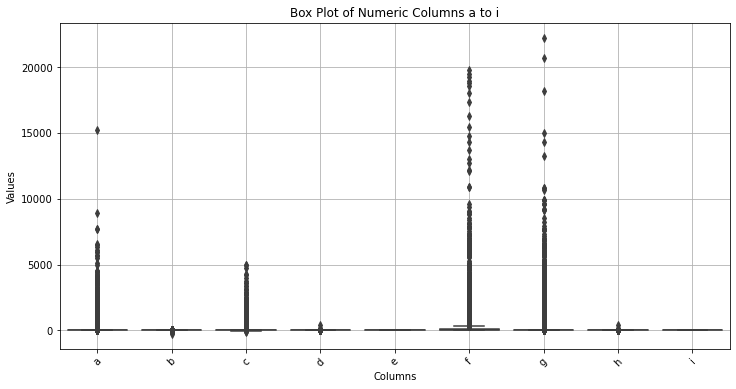

In [14]:
import matplotlib.pyplot as plt
import seaborn as sns

# Create a boxplot for all numeric columns to visualize outliers
plt.figure(figsize=(12, 6))
sns.boxplot(data=numeric_columns)
plt.title('Box Plot of Numeric Columns a to i')
plt.ylabel('Values')
plt.xlabel('Columns')
plt.xticks(rotation=45)
plt.grid(True)
plt.show()

Observations

1. Columns a to i might represent sales or products that were sold and later returned, or revenue.
2. There are 3 unique regions: 'LATAM', 'Asia Pacific', and 'America'.
3. There are 1249 unique SKUs.
4. Columns e and i are all 0s.
5. There are data type issues.
6. For columns a, c, and f, these columns are right-skewed.

Fixes

1. Convert 'fiscal_week_end_date' to datetime format.
2. For skewed datasets, we can use normalization.
3. For columns e and i, need to confirm the meaning of the numerical values.

Anomaly Detection


1. Use statistical metrics like mean, median, and standard deviation to find outliers in numerical columns. Z-score or IQR (Interquartile Range) methods can be effective.
2. Plotting data can sometimes reveal outliers directly. Box plots and scatter plots are particularly useful for this.

The boxes, which represent the interquartile range (IQR), seem to be very small or not visible for most of the columns, which suggests that the middle 50% of the values in these columns are very close to each other.
It's also worth noting the scale of the y-axis goes up to over 20,000, but most of the data (including the IQR and the whiskers) for columns a to i is clustered near the bottom of the plot. This highlights the presence of extreme outliers in the data.